In [4]:
# 01 - Exploração Inicial do Dataset

import pandas as pd

df = pd.read_csv('../tmdb_5000_movies.csv')

print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
print(df.dtypes)

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

                          title     budget     revenue
0                        Avatar  237000000  2787965087
25                      Titanic  200000000  1845034188
16                 The Avengers  220000000  1519557910
28               Jurassic World  150000000  1513528810
44                    Furious 7  190000000  1506249360
7       Avengers: Age of Ultron  280000000  1405403694
124                      Frozen  150000000  1274219009
31                   Iron Man 3  200000000  1215439994
546                     Minions   74000000  1156730962
26   Captain America: Civil War  250000000  1153304495


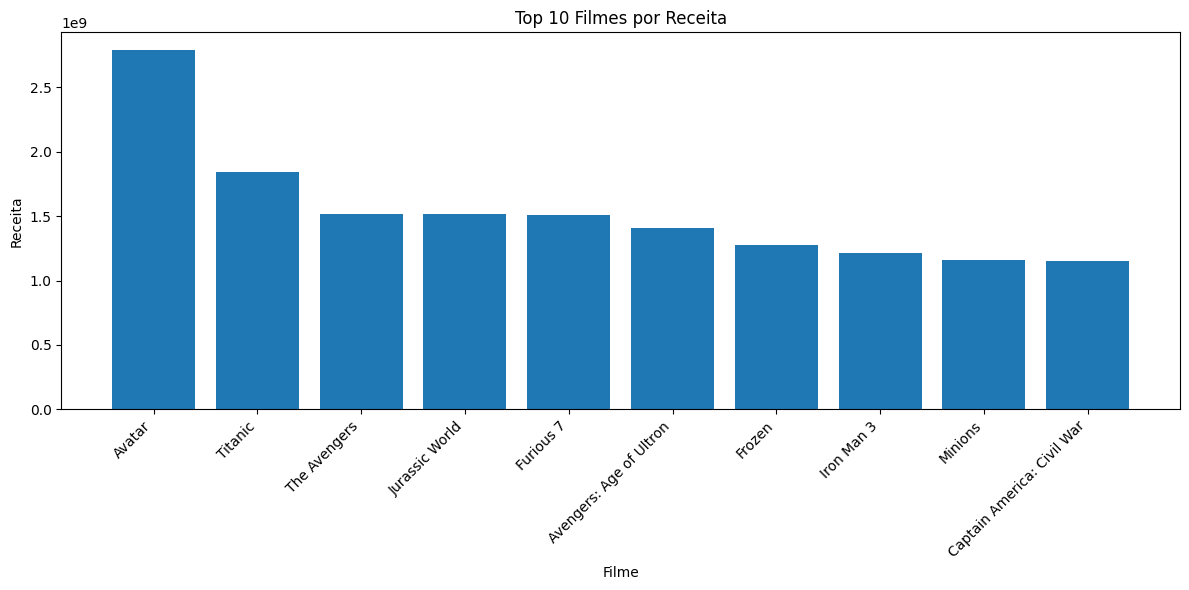

In [5]:
# 02 - Top 10 Filmes por Receita

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../tmdb_5000_movies.csv')
top_10 = df.sort_values('revenue', ascending=False).head(10)

print(top_10[['title', 'budget', 'revenue']])

plt.figure(figsize=(12, 6))
plt.bar(top_10['title'], top_10['revenue'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Filmes por Receita')
plt.xlabel('Filme')
plt.ylabel('Receita')
plt.tight_layout()
plt.show()

In [6]:
# 03 - ROI (Retorno sobre Investimento)

import pandas as pd

df = pd.read_csv('../tmdb_5000_movies.csv')
df = df[df['budget'] > 0]
df['roi'] = (df['revenue'] - df['budget']) / df['budget']

print(df[['title', 'roi']].sort_values(by='roi', ascending=False).head(10))

                        title           roi
4238             Modern Times  8.499999e+06
3137                Nurse 3-D  9.999990e+05
4577      Paranormal Activity  1.288939e+04
4582                Tarnation  5.329339e+03
4496  The Blair Witch Project  4.132333e+03
4724               Eraserhead  6.990000e+02
4788           Pink Flamingos  4.990000e+02
4742            Super Size Me  4.386166e+02
4723              The Gallows  4.256441e+02
4514               Open Water  4.195227e+02


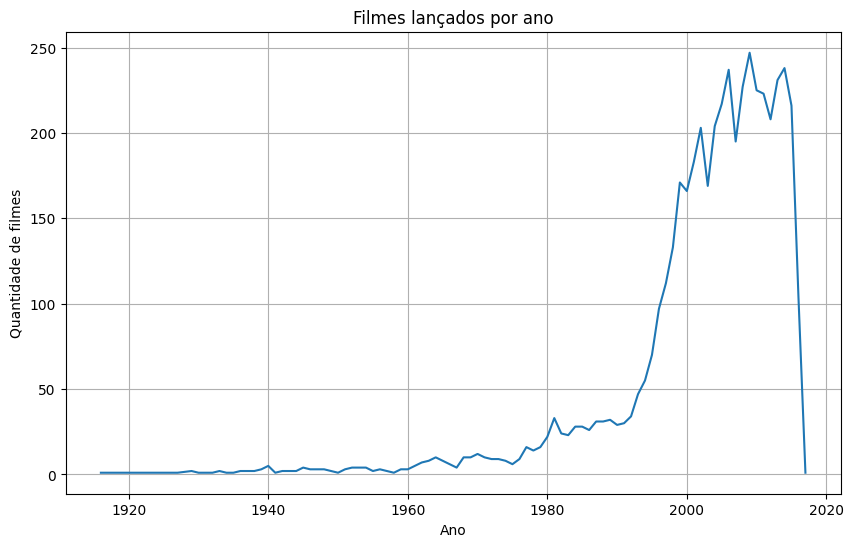

In [7]:
# 04 - Lançamentos por Ano

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../tmdb_5000_movies.csv')
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year

count_by_year = df['year'].value_counts().sort_index()

count_by_year.plot(kind='line', figsize=(10, 6), title='Filmes lançados por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de filmes')
plt.grid(True)
plt.show()

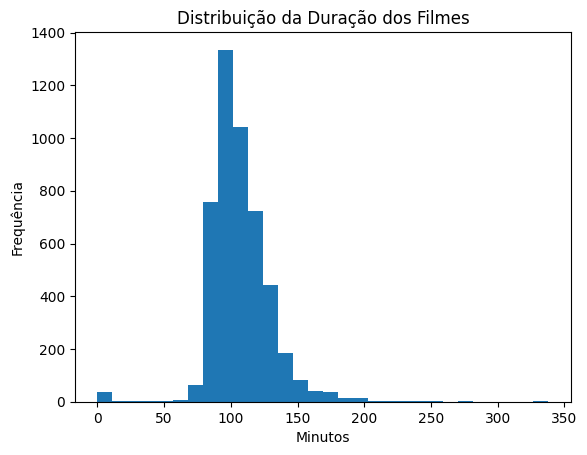

In [8]:
# 05 - Duração dos Filmes (Runtime)

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../tmdb_5000_movies.csv')

plt.hist(df['runtime'].dropna(), bins=30)
plt.title('Distribuição da Duração dos Filmes')
plt.xlabel('Minutos')
plt.ylabel('Frequência')
plt.show()

In [9]:
# 06 - Filmes Mais Populares e Mais Votados

import pandas as pd

df = pd.read_csv('../tmdb_5000_movies.csv')

print("Top 10 por Popularidade:")
print(df[['title', 'popularity']].sort_values(by='popularity', ascending=False).head(10))

print("\nTop 10 por Número de Votos:")
print(df[['title', 'vote_count']].sort_values(by='vote_count', ascending=False).head(10))

Top 10 por Popularidade:
                                                 title  popularity
546                                            Minions  875.581305
95                                        Interstellar  724.247784
788                                           Deadpool  514.569956
94                             Guardians of the Galaxy  481.098624
127                                 Mad Max: Fury Road  434.278564
28                                      Jurassic World  418.708552
199  Pirates of the Caribbean: The Curse of the Bla...  271.972889
82                      Dawn of the Planet of the Apes  243.791743
200              The Hunger Games: Mockingjay - Part 1  206.227151
88                                          Big Hero 6  203.734590

Top 10 por Número de Votos:
                       title  vote_count
96                 Inception       13752
65           The Dark Knight       12002
0                     Avatar       11800
16              The Avengers       11776
788 

In [10]:
# 07 - Média de Avaliação por Idioma

import pandas as pd

df = pd.read_csv('../tmdb_5000_movies.csv')

avg_by_lang = df.groupby('original_language')['vote_average'].mean().sort_values(ascending=False)
print(avg_by_lang)

original_language
te    7.500000
id    7.400000
he    7.400000
fa    7.375000
ar    7.300000
nl    7.175000
da    7.128571
pl    7.100000
xx    7.100000
sv    7.060000
ja    7.050000
it    7.028571
af    6.900000
el    6.900000
is    6.900000
nb    6.700000
ko    6.672727
es    6.659375
cn    6.500000
hu    6.500000
fr    6.430000
pt    6.388889
ru    6.354545
de    6.325926
zh    6.300000
ps    6.300000
no    6.100000
en    6.065683
hi    6.010526
sl    6.000000
th    5.966667
ta    5.850000
cs    5.650000
vi    5.000000
tr    4.300000
ro    3.650000
ky    0.000000
Name: vote_average, dtype: float64


In [11]:
# 08 - Análise de Gêneros

import pandas as pd
import ast
from collections import Counter

df = pd.read_csv('../tmdb_5000_movies.csv')
df['genres'] = df['genres'].apply(lambda x: [d['name'] for d in ast.literal_eval(x)] if pd.notnull(x) else [])

all_genres = sum(df['genres'], [])
genre_counts = Counter(all_genres)

print(genre_counts.most_common(10))

[('Drama', 2297), ('Comedy', 1722), ('Thriller', 1274), ('Action', 1154), ('Romance', 894), ('Adventure', 790), ('Crime', 696), ('Science Fiction', 535), ('Horror', 519), ('Family', 513)]


In [12]:
# 09 - Palavras-chave Mais Frequentes

import pandas as pd
import ast
from collections import Counter

df = pd.read_csv('../tmdb_5000_movies.csv')
df['keywords'] = df['keywords'].apply(lambda x: [d['name'] for d in ast.literal_eval(x)] if pd.notnull(x) else [])

all_keywords = sum(df['keywords'], [])
keyword_counts = Counter(all_keywords)

print(keyword_counts.most_common(10))

[('woman director', 324), ('independent film', 318), ('duringcreditsstinger', 307), ('based on novel', 197), ('murder', 189), ('aftercreditsstinger', 170), ('violence', 150), ('dystopia', 139), ('sport', 126), ('revenge', 118)]


In [13]:
# 10 - Produtoras Mais Ativas

import pandas as pd
import ast
from collections import Counter

df = pd.read_csv('../tmdb_5000_movies.csv')
df['production_companies'] = df['production_companies'].apply(lambda x: [d['name'] for d in ast.literal_eval(x)] if pd.notnull(x) else [])

all_companies = sum(df['production_companies'], [])
company_counts = Counter(all_companies)

print(company_counts.most_common(10))

[('Warner Bros.', 319), ('Universal Pictures', 311), ('Paramount Pictures', 285), ('Twentieth Century Fox Film Corporation', 222), ('Columbia Pictures', 201), ('New Line Cinema', 165), ('Metro-Goldwyn-Mayer (MGM)', 122), ('Touchstone Pictures', 118), ('Walt Disney Pictures', 114), ('Relativity Media', 102)]


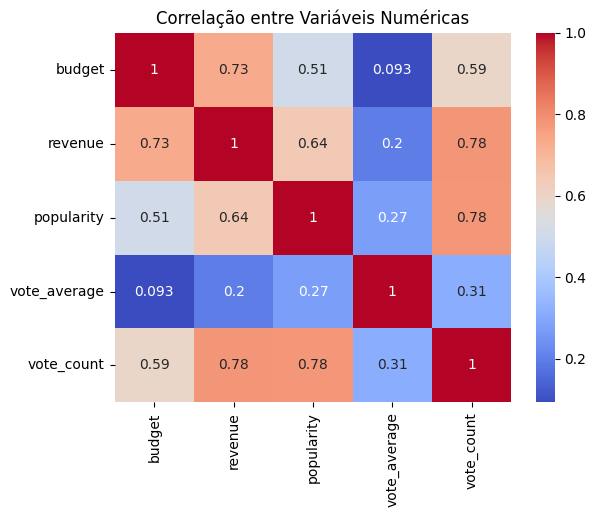

In [14]:
# 11 - Correlação entre Variáveis Numéricas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../tmdb_5000_movies.csv')

num_cols = ['budget', 'revenue', 'popularity', 'vote_average', 'vote_count']
corr = df[num_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis Numéricas')
plt.show()

In [15]:
# 12 - Países de Produção Mais Ativos

import pandas as pd
import ast
from collections import Counter

df = pd.read_csv('../tmdb_5000_movies.csv')
df['production_countries'] = df['production_countries'].apply(lambda x: [d['name'] for d in ast.literal_eval(x)] if pd.notnull(x) else [])

all_countries = sum(df['production_countries'], [])
country_counts = Counter(all_countries)

print(country_counts.most_common(10))

[('United States of America', 3956), ('United Kingdom', 636), ('Germany', 324), ('France', 306), ('Canada', 261), ('Australia', 110), ('Italy', 72), ('Spain', 71), ('China', 59), ('Japan', 58)]


In [16]:
# 13 - Taglines Mais Criativas

import pandas as pd

df = pd.read_csv('../tmdb_5000_movies.csv')

df['tagline_len'] = df['tagline'].fillna('').apply(len)
print(df[['title', 'tagline', 'tagline_len']].sort_values(by='tagline_len', ascending=False).head(10))

                         title  \
2524     Coal Miner's Daughter   
4110        Inside Deep Throat   
3315   The Hotel New Hampshire   
3596         Y Tu Mamá También   
4238              Modern Times   
3006  Twilight Zone: The Movie   
2456               The Verdict   
1202              Legal Eagles   
3680             Lady in White   
4295           Monsoon Wedding   

                                                tagline  tagline_len  
2524  She was married at 13. She had four kids by th...          252  
4110  It was filmed in 6 days for 25 thousand dollar...          221  
3315  If you experienced "The World According To Gar...          220  
3596  Life has its ways of teaching. Life has its wa...          208  
4238  He stands alone as the greatest entertainer of...          206  
3006  You're travelling through another dimension. A...          202  
2456  The doctors want to settle, the Church wants t...          200  
1202  Tom Logan has a law partner who put a dog on t...  

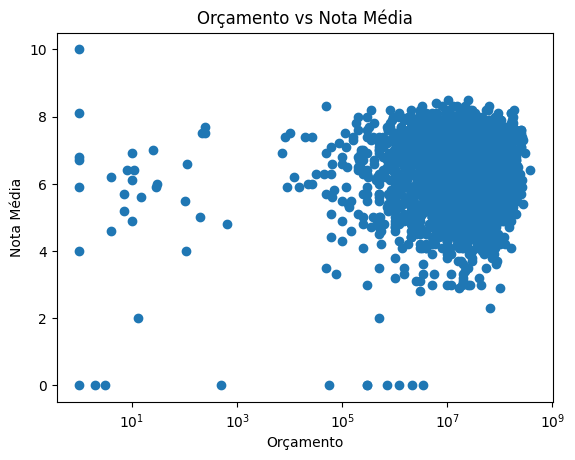

In [17]:
# 14 - Orçamento vs Nota Média

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../tmdb_5000_movies.csv')
df = df[df['budget'] > 0]

plt.scatter(df['budget'], df['vote_average'])
plt.xlabel('Orçamento')
plt.ylabel('Nota Média')
plt.title('Orçamento vs Nota Média')
plt.xscale('log')
plt.show()

In [18]:
# 15 - Ranking Ponderado Estilo IMDb

import pandas as pd

df = pd.read_csv('../tmdb_5000_movies.csv')

C = df['vote_average'].mean()
m = df['vote_count'].quantile(0.90)

qualified = df[df['vote_count'] >= m].copy()
qualified['score'] = qualified.apply(lambda x: (x['vote_count'] / (x['vote_count'] + m) * x['vote_average']) + (m / (m + x['vote_count']) * C), axis=1)

print(qualified[['title', 'vote_count', 'vote_average', 'score']].sort_values(by='score', ascending=False).head(10))

                                              title  vote_count  vote_average  \
1881                       The Shawshank Redemption        8205           8.5   
662                                      Fight Club        9413           8.3   
65                                  The Dark Knight       12002           8.2   
3232                                   Pulp Fiction        8428           8.3   
96                                        Inception       13752           8.1   
3337                                  The Godfather        5893           8.4   
95                                     Interstellar       10867           8.1   
809                                    Forrest Gump        7927           8.2   
329   The Lord of the Rings: The Return of the King        8064           8.1   
1990                        The Empire Strikes Back        5879           8.2   

         score  
1881  8.059258  
662   7.939256  
65    7.920020  
3232  7.904645  
96    7.863239  
3337  